Fig. 2a

- input file: individual accuracy

In [1]:
fn_sample_ids = 'hgdp_imputation.txt'
fn = './s1_result/individual_acc.tsv'
outdir = 's2_result'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.makedirs(outdir, exist_ok=True)

In [3]:
# Nature style
import matplotlib.pyplot as plt

fontsize = 7
capsize = 1.5
plt.rcParams.update({
    # Figure size and DPI
    'figure.dpi': 300, # High DPI for initial saving
    'savefig.dpi': 300, # High DPI for output file
    'savefig.bbox': 'tight', # Removes excess white space around figure
    'savefig.transparent': True, # Make the background transparent
    
    # Font settings
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica'], # Use Helvetica or Arial
    'pdf.fonttype': 42,
    # size: 5-7 
    'font.size': fontsize, # Base size. Axes labels will be this size.
    'axes.titlesize': fontsize, # Size of the axes title
    'axes.labelsize': fontsize, # Size of the x and y labels
    'xtick.labelsize': fontsize, # Size of the x-tick labels
    'ytick.labelsize': fontsize, # Size of the y-tick labels
    'legend.fontsize': fontsize, # Size of the legend text
    
    # Line settings
    'lines.linewidth': .5,
    'lines.markersize': 2,
    
    # Axes settings
    'axes.linewidth': 0.5, # Width of the axes border
    'xtick.major.width': 0.5, # Width of the x-tick lines
    'ytick.major.width': 0.5, # Width of the y-tick lines
    'xtick.major.size': 3, # Length of the x-ticks
    'ytick.major.size': 3, # Length of the y-ticks
    
    # Other settings
    'legend.frameon': False, # Remove the box around the legend
    'legend.handlelength': 1.5, # Length of the legend lines
})

# Define the WIDTH of your figure in inches (Single column: 89 mm, double column: 183 mm, max height: 170 mm)
width_in_inches = 85/25.4 # 85 mm
height_in_inches = 85/25.4 # 85 mm
figsize=(width_in_inches, height_in_inches)


accuracies of 216 individuals from HGDP

In [4]:
df = pd.read_csv('./s1_result/individual_acc.tsv', sep='\t')
print('df.head():\n', df.head())

df.head():
   sample  num_correct  num_total   accuracy       method          ref  \
0      0        63679      65690  96.938651  snpbag_base  snpbag_base   
1      1        63790      65690  97.107627  snpbag_base  snpbag_base   
2      2        63703      65690  96.975186  snpbag_base  snpbag_base   
3      3        63999      65690  97.425788  snpbag_base  snpbag_base   
4      4        64212      65690  97.750038  snpbag_base  snpbag_base   

            continent  
0              EUROPE  
1              EUROPE  
2              EUROPE  
3              EUROPE  
4  CENTRAL_SOUTH_ASIA  


In [5]:
print(len(df))

4320


In [6]:
# Prepare data for barplot: mean and standard error of accuracy for each method
def standard_error(x):
    return np.std(x) / np.sqrt(len(x))

def standard_deviation(x):
    return np.std(x)

def confidence_interval(x):
    return np.std(x) * 1.96 / np.sqrt(len(x))

In [7]:
df_stats = df.groupby('method')['accuracy'].agg(mean='mean', eb=standard_error).reset_index()

                   method       mean        eb
11    eagle_noREF_minimac  96.246530  0.134103
5    beagle_noREF_minimac  96.303535  0.131205
17  shapeit_noREF_minimac  96.317433  0.129483
8       eagle_REF_minimac  96.529663  0.125448
9      eagle_noREF_beagle  96.546726  0.127312
14    shapeit_REF_minimac  96.556833  0.121546
2      beagle_REF_minimac  96.582305  0.121738
3     beagle_noREF_beagle  96.609707  0.124341
15   shapeit_noREF_beagle  96.637667  0.124480
18            snpbag_base  96.776618  0.110765
6        eagle_REF_beagle  96.817800  0.120740
10     eagle_noREF_impute  96.824489  0.116231
12     shapeit_REF_beagle  96.835716  0.114881
4     beagle_noREF_impute  96.875361  0.112057
0       beagle_REF_beagle  96.889034  0.114757
16   shapeit_noREF_impute  96.902891  0.111674
7        eagle_REF_impute  97.061091  0.109700
13     shapeit_REF_impute  97.087182  0.105191
1       beagle_REF_impute  97.104767  0.104771
19         snpbag_ft_omni  97.160731  0.104159
methods:
 ['e

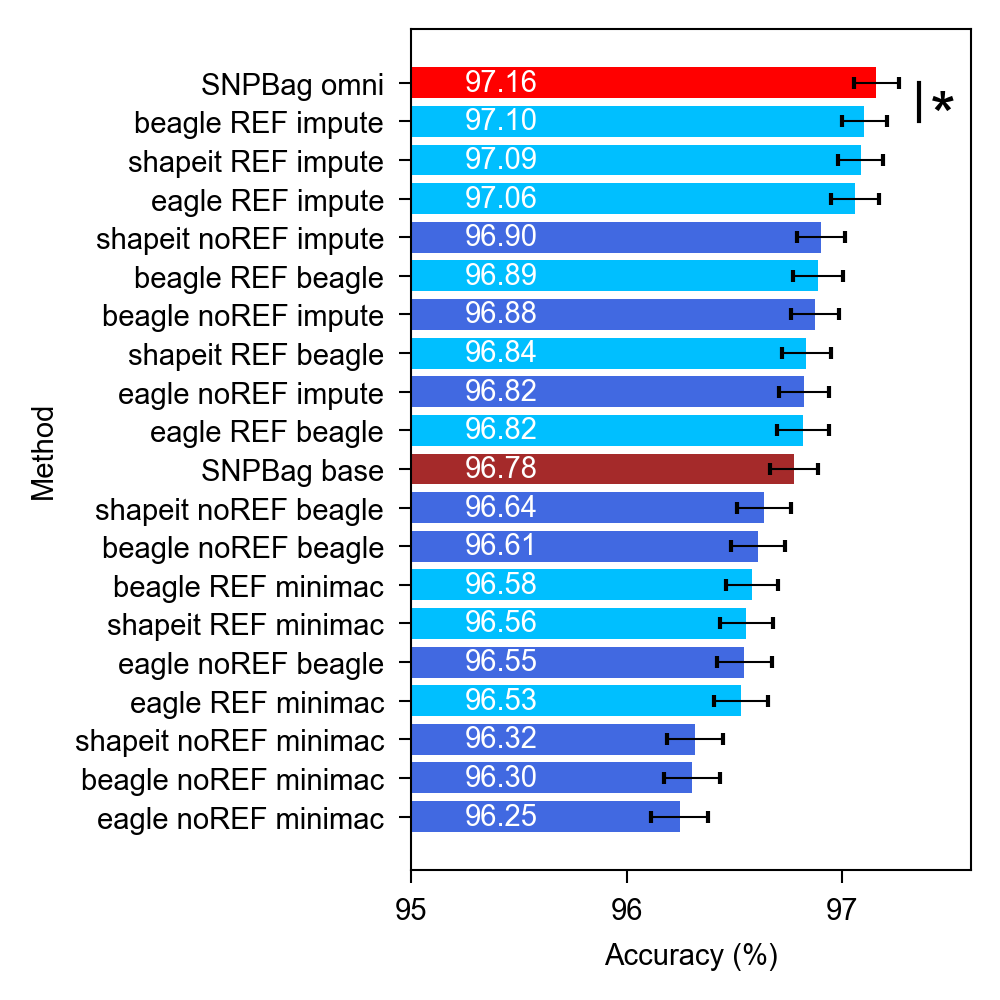

In [8]:
# sort by mean accuracy
df_stats = df_stats.sort_values('mean', ascending=True)
print(df_stats)
methods = list(df_stats['method'].unique())
print('methods:\n', methods)
method_pos = np.arange(len(methods))

# Define a color mapping for each method
method2color = {}
for i,method in enumerate(methods):
    if 'snpbag_ft' in method:
        method2color[method] = 'red'
    elif 'snpbag_base' in method:
        method2color[method] = 'brown'
    elif '_REF_' in method:
        method2color[method] = 'deepskyblue'
    elif '_noREF_' in method:
        method2color[method] = 'royalblue'

method2label = {}
for i,method in enumerate(methods):
    if 'snpbag_ft' in method:
        method2label[method] = 'SNPBag omni'
    elif 'snpbag_base' in method:
        method2label[method] = 'SNPBag base'
    elif '_REF_' in method:
        method2label[method] = method.replace('_REF_', ' REF ')
    elif '_noREF_' in method:
        method2label[method] = method.replace('_noREF_', ' noREF ')

bar_colors = [method2color[method] for method in df_stats['method']]

# make horizontal barplot of accuracy by method with error bars
plt.figure(figsize=figsize)

# Plot horizontal bars with error bars using matplotlib, applying color mapping
bars = plt.barh(
    df_stats['method'],
    df_stats['mean'],
    xerr=df_stats['eb'],
    capsize=capsize,
    edgecolor='black',
    color=bar_colors,
    linewidth=0,
)

# Add text to the right of each bar
for bar, mean, err in zip(bars, df_stats['mean'], df_stats['eb']):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(
        # width + 0.25, y,
        95.25, y,
        f"{mean:.2f}",
        va='center',
        ha='left',
        fontsize=fontsize,
        color='white'
    )

# add stars to the top 2 bars
def add_star(bars):
    # Add a star to indicate that the top 2 bars are significantly different
    # (Assume the top 2 bars are the last two in the sorted df_stats)
    # We'll add a star above the two top bars and a connecting line

    # Get y positions of the top 2 bars
    top2_indices = [-1, -2]  # last two bars (highest means)
    y1 = bars[top2_indices[0]].get_y() + bars[top2_indices[0]].get_height() / 2
    y2 = bars[top2_indices[1]].get_y() + bars[top2_indices[1]].get_height() / 2
    x1 = bars[top2_indices[0]].get_width()
    x2 = bars[top2_indices[1]].get_width()
    # For horizontal bar, y1 > y2 (lower on plot is higher mean)

    # Set the x position for the star (just to the right of the higher bar)
    star_x = max(x1, x2) + 0.15
    # Set the y position for the star (midpoint between the two bars, slightly above)
    star_y = (y1 + y2) / 2 - 0.5

    # Draw a horizontal line connecting the two bars
    line_x_start = max(x1, x2) + 0.2
    line_x_end = line_x_start
    line_y_start = y1
    line_y_end = y2
    plt.plot([line_x_start, line_x_end],
            [line_y_start, line_y_end],
            color='black', 
            linewidth=1.0,
            )

    # Draw the star
    plt.text(star_x + 0.1, star_y, '*', fontsize=16, color='black', va='center', ha='left')

add_star(bars)

# update y tick labels
plt.yticks(method_pos, [method2label[method] for method in methods])

plt.xlabel('Accuracy (%)')
plt.ylabel('Method')
plt.tight_layout()
plt.xlim(95, 97.6)
plt.xticks(np.arange(95, 97.6, 1))
plt.tight_layout()

plt.savefig(f'{outdir}/method_comparison_bars.pdf')
plt.show()
plt.close()

In [9]:
# get sample IDs
sample_ids = pd.read_csv(fn_sample_ids, sep='\t', header=0)['library'].values

# Paired-sample t-test between snpbag_ft_omni and beagle_REF_impute for accuracy

# Ensure both methods have the same samples and are aligned
df1 = df[df['method'] == 'snpbag_ft_omni'].copy()
df2 = df[df['method'] == 'beagle_REF_impute'].copy()
df1['sample'] = sample_ids
df1 = df1.sort_values('sample')
df2 = df2.sort_values('sample')

# Check that the samples match
if not np.array_equal(df1['sample'].values, df2['sample'].values):
    raise ValueError("Sample IDs do not match between snpbag_ft_omni and beagle_REF_impute.")

acc1 = df1['accuracy'].values
acc2 = df2['accuracy'].values

# Paired-sample t-test
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(acc1, acc2)
print(f't-statistic: {t_stat:.4f}')
print(f'p-value: {p_value:.4e}')

t-statistic: 3.5679
p-value: 4.4358e-04
